---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 3

In this assignment you will explore measures of centrality on two networks, a friendship network in Part 1, and a blog network in Part 2.

## Part 1

Answer questions 1-4 using the network `G1`, a network of friendships at a university department. Each node corresponds to a person, and an edge indicates friendship. 

*The network has been loaded as networkx graph object `G1`.*

In [1]:
import networkx as nx

G1 = nx.read_gml('../../data/gml/friendships.gml')

In [2]:

# Draw the graph using various layouts
def get_layout_dict(G):
    layout_dict = {}
    for layout_type in [function for function in dir(nx) if '_layout' in function]:
        try:
            layout_dict[layout_type] = getattr(nx, layout_type)(G)
        except Exception as e:
            print(layout_type, e)
    
    return layout_dict

LAYOUT_DICT = get_layout_dict(G1)
print(LAYOUT_DICT.keys())

rescale_layout 'Graph' object has no attribute 'shape'
dict_keys(['circular_layout', 'fruchterman_reingold_layout', 'kamada_kawai_layout', 'random_layout', 'shell_layout', 'spectral_layout', 'spring_layout'])


In [3]:

import matplotlib.pyplot as plt
%matplotlib inline

def show_graph(G, layout, color_dict=None):
    pos_dict = LAYOUT_DICT[layout]
    plt.figure(figsize=(18, 8))
    label_dict = nx.draw_networkx_labels(G, pos=pos_dict, font_size=12, alpha=0.5)
    line_collection = nx.draw_networkx_edges(G, pos=pos_dict, width=0.5, alpha=0.5)

    # Color according to degree centrality
    node_list = G.nodes()
    if color_dict is None:
        color_dict = nx.degree_centrality(G)
    node_color_list = [color_dict[node] for node in node_list]
    path_collection = nx.draw_networkx_nodes(G, pos=pos_dict, nodelist=node_list, alpha=0.5,
                                             node_size=200, node_color=node_color_list, cmap='viridis')

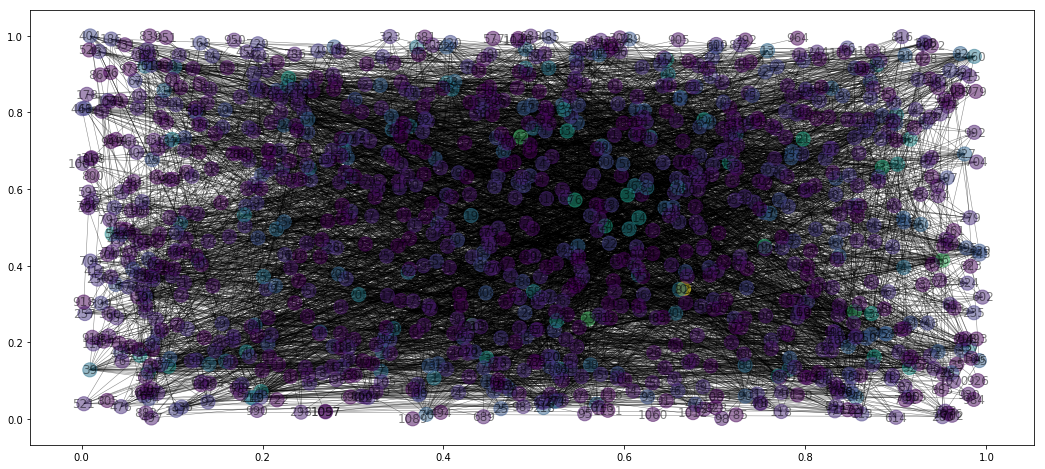

In [4]:

show_graph(G1, 'random_layout')

### Question 1

Find the degree centrality, closeness centrality, and normalized betweeness centrality (excluding endpoints) of node 100.

*This function should return a tuple of floats `(degree_centrality, closeness_centrality, betweenness_centrality)`.*

In [5]:
def answer_one():
        
    # Your Code Here
    degree_centrality = nx.degree_centrality(G1)[100]
    closeness_centrality = nx.closeness_centrality(G1, u=100)
    betweenness_centrality = nx.betweenness_centrality(G1, normalized=True, endpoints=False)[100]
    
    return (degree_centrality, closeness_centrality, betweenness_centrality) # Your Answer Here

In [17]:

answer_one()

(0.0026501766784452294, 0.2654784240150094, 7.142902633244772e-05)

<br>
#### For Questions 2, 3, and 4, assume that you do not know anything about the structure of the network, except for the all the centrality values of the nodes. That is, use one of the covered centrality measures to rank the nodes and find the most appropriate candidate.
<br>

### Question 2

Suppose you are employed by an online shopping website and are tasked with selecting one user in network G1 to send an online shopping voucher to. We expect that the user who receives the voucher will send it to their friends in the network.  You want the voucher to reach as many nodes as possible. The voucher can be forwarded to multiple users at the same time, but the travel distance of the voucher is limited to one step, which means if the voucher travels more than one step in this network, it is no longer valid. Apply your knowledge in network centrality to select the best candidate for the voucher. 

*This function should return an integer, the name of the node.*

In [6]:
def answer_two():
        
    # Your Code Here
    degree_centrality = nx.degree_centrality(G1)
    central_node = max(degree_centrality.items(), key=lambda x: x[1])[0]
    
    return central_node # Your Answer Here

In [18]:

answer_two()

105

### Question 3

Now the limit of the voucher’s travel distance has been removed. Because the network is connected, regardless of who you pick, every node in the network will eventually receive the voucher. However, we now want to ensure that the voucher reaches the nodes in the lowest average number of hops.

How would you change your selection strategy? Write a function to tell us who is the best candidate in the network under this condition.

*This function should return an integer, the name of the node.*

In [53]:
def answer_three():
    
    # Your Code Here
    nodes = G1.nodes()
    central_tuple = min({node: sum([x[1] for x in nx.shortest_path_length(G1,
                                                                          source=node).items()]) for node in nodes}.items(),
                        key=lambda x: x[1])
    
    return central_tuple[0] # Your Answer Here

In [54]:

answer_three()

23

### Question 4

Assume the restriction on the voucher’s travel distance is still removed, but now a competitor has developed a strategy to remove a person from the network in order to disrupt the distribution of your company’s voucher. Your competitor is specifically targeting people who are often bridges of information flow between other pairs of people. Identify the single riskiest person to be removed under your competitor’s strategy?

*This function should return an integer, the name of the node.*

In [8]:
def answer_four():
        
    # Your Code Here
    closeness_centrality = nx.closeness_centrality(G1)
    central_node = max(closeness_centrality.items(), key=lambda x: x[1])[0]
    
    return central_node # Your Answer Here

In [20]:

answer_four()

23

## Part 2

`G2` is a directed network of political blogs, where nodes correspond to a blog and edges correspond to links between blogs. Use your knowledge of PageRank and HITS to answer Questions 5-9.

In [9]:
G2 = nx.read_gml('../../data/gml/blogs.gml')

In [10]:

# Draw the graph using various layouts
LAYOUT_DICT = get_layout_dict(G2)
print(LAYOUT_DICT.keys())

rescale_layout 'DiGraph' object has no attribute 'shape'
dict_keys(['circular_layout', 'fruchterman_reingold_layout', 'kamada_kawai_layout', 'random_layout', 'shell_layout', 'spectral_layout', 'spring_layout'])


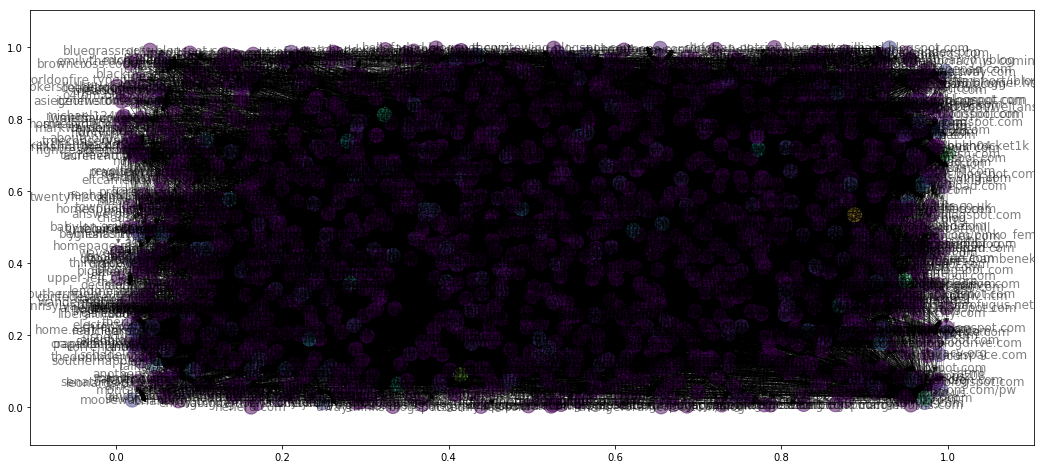

In [11]:

import matplotlib.pyplot as plt
%matplotlib inline

color_dict = nx.pagerank(G2, alpha=0.8)
show_graph(G2, 'random_layout', color_dict=color_dict)

### Question 5

Apply the Scaled Page Rank Algorithm to this network. Find the Page Rank of node 'realclearpolitics.com' with damping value 0.85.

*This function should return a float.*

In [12]:
def answer_five():
        
    # Your Code Here
    pagerank_dict = nx.pagerank(G2, alpha=0.85)
    
    return pagerank_dict['realclearpolitics.com'] # Your Answer Here

In [21]:

answer_five()

0.004636694781649094

### Question 6

Apply the Scaled Page Rank Algorithm to this network with damping value 0.85. Find the 5 nodes with highest Page Rank. 

*This function should return a list of the top 5 blogs in desending order of Page Rank.*

In [13]:
def answer_six():
        
    # Your Code Here
    pagerank_dict = nx.pagerank(G2, alpha=0.85)
    tuple_list = sorted(pagerank_dict.items(), key=lambda x: x[1], reverse=True)[:5]
    
    return [tuple[0] for tuple in tuple_list] # Your Answer Here

In [22]:

answer_six()

['dailykos.com',
 'atrios.blogspot.com',
 'instapundit.com',
 'blogsforbush.com',
 'talkingpointsmemo.com']

### Question 7

Apply the HITS Algorithm to the network to find the hub and authority scores of node 'realclearpolitics.com'. 

*Your result should return a tuple of floats `(hub_score, authority_score)`.*

In [14]:
def answer_seven():
        
    # Your Code Here
    hubs_auths_tuple = nx.hits(G2)
    hubs_dict = hubs_auths_tuple[0]
    hub_score = hubs_dict['realclearpolitics.com']
    auths_dict = hubs_auths_tuple[1]
    authority_score = auths_dict['realclearpolitics.com']
    
    return (hub_score, authority_score) # Your Answer Here

In [23]:

answer_seven()

(0.0003243556140916672, 0.003918957645699851)

### Question 8 

Apply the HITS Algorithm to this network to find the 5 nodes with highest hub scores.

*This function should return a list of the top 5 blogs in desending order of hub scores.*

In [15]:
def answer_eight():
        
    # Your Code Here
    hubs_dict = nx.hits(G2)[0]
    tuple_list = sorted(hubs_dict.items(), key=lambda x: x[1], reverse=True)[:5]
    
    return [tuple[0] for tuple in tuple_list] # Your Answer Here

In [24]:

answer_eight()

['politicalstrategy.org',
 'madkane.com/notable.html',
 'liberaloasis.com',
 'stagefour.typepad.com/commonprejudice',
 'bodyandsoul.typepad.com']

### Question 9 

Apply the HITS Algorithm to this network to find the 5 nodes with highest authority scores.

*This function should return a list of the top 5 blogs in desending order of authority scores.*

In [16]:
def answer_nine():
        
    # Your Code Here
    auths_dict = nx.hits(G2)[1]
    tuple_list = sorted(auths_dict.items(), key=lambda x: x[1], reverse=True)[:5]
    
    return [tuple[0] for tuple in tuple_list] # Your Answer Here

In [25]:

answer_nine()

['dailykos.com',
 'talkingpointsmemo.com',
 'atrios.blogspot.com',
 'washingtonmonthly.com',
 'talkleft.com']